In [1]:
!pip install selenium

In [23]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors


import matplotlib.pyplot as plt
#%matplotlib inline
from folium.features import DivIcon
import folium
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

#%matplotlib widget
%matplotlib inline

In [24]:
!ls

2020_Building_Energy_Benchmarking.csv
Context_study_in_r.ipynb
Data _Wrangling _Building_Platforms.ipynb
EPD_Files
GIS_data
README.md
Rhino_output
South_Campus_Energy_Plots.ipynb
South_UW_energy_benchmarking.csv
UW_2020_energy_benchmark (1).csv
UW_2020_energy_benchmark.csv
UWenergy_benchmarking.csv
big_building.png
building_polygon.shp
energy_benchmarking.GeoJSON


## Import Data
- 2020 seattle energy benchmarking data
- campus facilities building layouts

In [25]:
#eb= pd.read_csv("2020_Building_Energy_Benchmarking.csv", sep=',')

eb= pd.read_csv("South_UW_energy_benchmarking.csv", sep=',')


eb.head()
#list(eb.columns)

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,49770,2020,University of Washington Medical Center (UWMC),NonResidential,1625049001,1959 NE PACIFIC ST,NaN,NaN,NaN,47.65034,...,NaN,44327760,122879824,5128,Compliant,No Issue,151246317.0,512795.0,11031.5,6.8
1,49973,2020,UW - FOEGE BUILDING (genome sciences),NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65644,...,NaN,13031380,60208736,69,Compliant,No Issue,44463069.0,6909.0,5234.6,43.7
2,49974,2020,UW - HEALTH SCIENCES J-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,NaN,4929713,30872392,0,Compliant,No Issue,16820181.0,0.0,2652.1,15.5
3,49975,2020,UW - HEALTH SCIENCES K-WING,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65566,...,NaN,0,0,0,Compliant,No Issue,NaN,NaN,NaN,NaN
4,49976,2020,UW - HEALTH SCIENCES RR-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,NaN,3524310,42968548,0,Compliant,No Issue,12024946.0,0.0,3630.7,25.8


In [26]:
eb.describe() 

,OSEBuildingID,DataYear,TaxParcelIdentificationNumber,ZipCode,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,8.000000,8.0,8.000000e+00,7.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.0,...,2.000000,0.0,0.0,8.000000e+00,8.000000e+00,8.000000,7.000000e+00,7.000000,7.000000,7.000000
mean,50058.250000,2020.0,1.625049e+09,98156.428571,47.652530,-122.309789,2.125000,1977.875000,5.12500,1.0,...,104871.500000,NaN,NaN,9.687273e+06,3.287211e+07,649.625000,3.777483e+07,74243.428571,3323.285714,13.885714
std,228.634299,0.0,0.000000e+00,48.107024,0.003032,0.001127,1.552648,16.556721,2.03101,0.0,...,27774.447258,NaN,NaN,1.452882e+07,4.295497e+07,1809.697839,5.156444e+07,193400.206611,3922.332076,15.987957
min,49770.000000,2020.0,1.625049e+09,98105.000000,47.650340,-122.312140,1.000000,1960.000000,4.00000,1.0,...,85232.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,6.806223e+06,0.000000,56.700000,0.200000
25%,49973.750000,2020.0,1.625049e+09,98105.000000,47.650340,-122.310410,1.000000,1963.750000,4.00000,1.0,...,95051.750000,NaN,NaN,2.840759e+06,0.000000e+00,0.000000,1.133988e+07,0.000000,328.700000,2.600000
50%,49975.500000,2020.0,1.625049e+09,98195.000000,47.650340,-122.309070,1.000000,1977.500000,4.50000,1.0,...,104871.500000,NaN,NaN,4.227012e+06,1.845990e+07,0.000000,1.682018e+07,0.000000,2652.100000,6.800000
75%,50085.000000,2020.0,1.625049e+09,98195.000000,47.655855,-122.309070,4.000000,1985.250000,5.00000,1.0,...,114691.250000,NaN,NaN,8.183457e+06,4.727860e+07,17.250000,3.343566e+07,3454.500000,4432.650000,20.650000
max,50412.000000,2020.0,1.625049e+09,98195.000000,47.656440,-122.309070,4.000000,2006.000000,10.00000,1.0,...,124511.000000,NaN,NaN,4.432776e+07,1.228798e+08,5128.000000,1.512463e+08,512795.000000,11031.500000,43.700000


In [27]:
eb_uw= eb.loc[eb['BuildingName'].str.contains('UW', case=False)]
eb_uw



eb_uw2 = eb_uw[eb_uw['Longitude'].between(-122.33, -122.28)]


eb_uw3 = eb_uw2[eb_uw2['Latitude'].between(47.64, 47.67)]






#make geospatial 
gdf_eb_uw = gpd.GeoDataFrame(
    eb_uw, geometry=gpd.points_from_xy(eb_uw.Longitude, eb_uw.Latitude), crs = "epsg:4326" )


#section for seattle campus 
gdf_eb_uw2 = gdf_eb_uw[gdf_eb_uw['Longitude'].between(-122.33, -122.28)]


gdf_eb_uw3 = gdf_eb_uw2[gdf_eb_uw2['Latitude'].between(47.64, 47.67)]


#save as csv
#gdf_eb_uw3.to_file('energy_benchmarking.GeoJSON', driver="GeoJSON")


gdf_eb_uw3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
gdf_eb_uw3.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,geometry
0,49770,2020,University of Washington Medical Center (UWMC),NonResidential,1625049001,1959 NE PACIFIC ST,NaN,NaN,NaN,47.65034,...,44327760,122879824,5128,Compliant,No Issue,151246317.0,512795.0,11031.5,6.8,POINT (-122.30907 47.65034)
1,49973,2020,UW - FOEGE BUILDING (genome sciences),NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65644,...,13031380,60208736,69,Compliant,No Issue,44463069.0,6909.0,5234.6,43.7,POINT (-122.31041 47.65644)
2,49974,2020,UW - HEALTH SCIENCES J-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,4929713,30872392,0,Compliant,No Issue,16820181.0,0.0,2652.1,15.5,POINT (-122.30907 47.65034)
3,49975,2020,UW - HEALTH SCIENCES K-WING,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65566,...,0,0,0,Compliant,No Issue,NaN,NaN,NaN,NaN,POINT (-122.31214 47.65566)
4,49976,2020,UW - HEALTH SCIENCES RR-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,3524310,42968548,0,Compliant,No Issue,12024946.0,0.0,3630.7,25.8,POINT (-122.30907 47.65034)


In [31]:
#eb_uw3.to_csv('UWenergy_benchmarking.csv')

In [32]:
!ls

2020_Building_Energy_Benchmarking.csv
Context_study_in_r.ipynb
Data _Wrangling _Building_Platforms.ipynb
EPD_Files
GIS_data
README.md
Rhino_output
South_Campus_Energy_Plots.ipynb
South_UW_energy_benchmarking.csv
UW_2020_energy_benchmark (1).csv
UW_2020_energy_benchmark.csv
UWenergy_benchmarking.csv
big_building.png
building_polygon.shp
energy_benchmarking.GeoJSON


footprints = gpd.read_file('Building_Outlines_2015.geojson')
footprints.geometry

#footprints = footprints.to_crs(4326)
footprints['lon'] = footprints.centroid.x  
footprints['lat'] = footprints.centroid.y

footprints2 = footprints[footprints['lon'].between(-122.33, -122.28)]

footprints3 = footprints2[footprints2['lat'].between(47.64, 47.67)]


footprints.head()

#footprints3.to_file('building_footprints.GeoJSON', driver="GeoJSON")

In [33]:
!ls GIS_data


building_polygon.cpg
building_polygon.dbf
building_polygon.prj
building_polygon.sbn
building_polygon.sbx
building_polygon.shp
building_polygon.shp.CBE-DC-30221645.7392.8700.sr.lock
building_polygon.shp.xml
building_polygon.shx


In [34]:
#import campus facilities shapefile 

uwfoot = gpd.read_file('GIS_data/building_polygon.shp')
uwfoot.crs

uwfoot= uwfoot.to_crs('epsg:4326') 

uwfoot['lon'] = uwfoot.centroid.x  
uwfoot['lat'] = uwfoot.centroid.y

uwfoot.crs

/var/folders/_0/wy7tb6qj0kn08q2vk43vjwb40000gn/T/ipykernel_38154/3166465109.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  uwfoot['lon'] = uwfoot.centroid.x
/var/folders/_0/wy7tb6qj0kn08q2vk43vjwb40000gn/T/ipykernel_38154/3166465109.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  uwfoot['lat'] = uwfoot.centroid.y


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
#gdf_eb_uw3= gdf_eb_uw3.to_crs('EPSG:2926') 
gdf_eb_uw3.crs = "epsg:4326" 

#gdf_eb_uw3= gdf_eb_uw3.to_crs("EPSG:2926")
gdf_eb_uw3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
gdf_eb_uw3.head(10)

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,geometry
0,49770,2020,University of Washington Medical Center (UWMC),NonResidential,1625049001,1959 NE PACIFIC ST,NaN,NaN,NaN,47.65034,...,44327760,122879824,5128,Compliant,No Issue,151246317.0,512795.0,11031.5,6.8,POINT (-122.30907 47.65034)
1,49973,2020,UW - FOEGE BUILDING (genome sciences),NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65644,...,13031380,60208736,69,Compliant,No Issue,44463069.0,6909.0,5234.6,43.7,POINT (-122.31041 47.65644)
2,49974,2020,UW - HEALTH SCIENCES J-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,4929713,30872392,0,Compliant,No Issue,16820181.0,0.0,2652.1,15.5,POINT (-122.30907 47.65034)
3,49975,2020,UW - HEALTH SCIENCES K-WING,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65566,...,0,0,0,Compliant,No Issue,NaN,NaN,NaN,NaN,POINT (-122.31214 47.65566)
4,49976,2020,UW - HEALTH SCIENCES RR-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,3524310,42968548,0,Compliant,No Issue,12024946.0,0.0,3630.7,25.8,POINT (-122.30907 47.65034)
5,49977,2020,UW - HITCHCOCK HALL,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105.0,47.65644,...,1994790,6047404,0,Compliant,No Issue,6806223.0,0.0,538.2,4.6,POINT (-122.31041 47.65644)
6,50409,2020,UW- MAGNUSON HEALTH SCIENCES CENTER BB,NonResidential,1625049001,1959 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,3122749,0,0,Compliant,No Issue,10654820.0,0.0,56.7,0.2,POINT (-122.30907 47.65034)
7,50412,2020,UW- MAGNUSON HEALTH SCIENCES CENTER H,NonResidential,1625049001,1959 NE PACIFIC ST,SEATTLE,WA,98195.0,47.65034,...,6567483,0,0,Compliant,No Issue,22408252.0,0.0,119.2,0.6,POINT (-122.30907 47.65034)


In [37]:
list(gdf_eb_uw3.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingName',
 'BuildingType',
 'TaxParcelIdentificationNumber',
 'Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Neighborhood',
 'CouncilDistrictCode',
 'YearBuilt',
 'NumberofFloors',
 'NumberofBuildings',
 'PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'ENERGYSTARScore',
 'SiteEUIWN(kBtu/sf)',
 'SiteEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'EPAPropertyType',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'Electricity(kWh)',
 'SteamUse(kBtu)',
 'NaturalGas(therms)',
 'ComplianceStatus',
 'ComplianceIssue',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'geometry']

In [38]:
uwfoot.head()

,objectid,facnum,faccode,facname,ownership,yearbuilt,gsf,st_area_sh,st_length_,st_area__1,st_length1,geometry,lon,lat
0,1,1196,PVP,Pavilion Pool,Owned,1939,27045,15672.337552,551.168997,15672.337552,551.168997,"POLYGON ((-122.30123 47.65220, -122.30089 47.6...",-122.301149,47.651935
1,2,1042,GCS,3935 University Way NE,Owned,1931,5363,3051.436190,234.182423,3051.436190,234.182423,"POLYGON ((-122.31376 47.65473, -122.31375 47.6...",-122.313600,47.654786
2,3,1323,ICT,Ethnic Cultural Theater,Owned,1941,12176,7896.765063,430.371742,7896.765063,430.371742,"POLYGON ((-122.31430 47.65504, -122.31430 47.6...",-122.314104,47.655167
3,4,1029,IC2,3930 Brooklyn NE,Owned,1940,3108,1201.545258,139.752497,1201.545258,139.752497,"POLYGON ((-122.31430 47.65496, -122.31430 47.6...",-122.314222,47.655001
4,5,1228,HSH,Magnuson Health Sciences Center H,Owned,1950,211284,28361.027819,1021.699582,28361.027819,1021.699582,"POLYGON ((-122.31012 47.65119, -122.31008 47.6...",-122.310498,47.650758


In [39]:
import contextily as cx
from adjustText import adjust_text

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x159a9ad60>

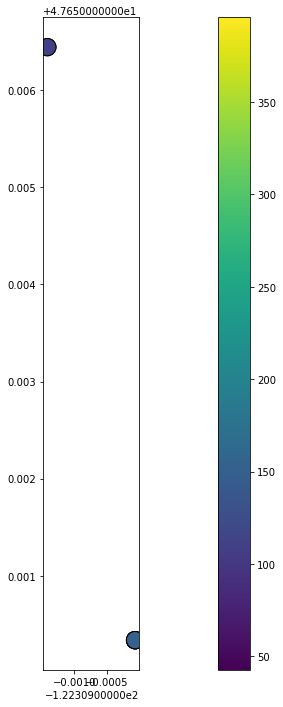

In [40]:
fig, ax = plt.subplots(figsize=(28, 12))
#uwfoot.plot(column="st_length_", ax=ax, legend=True, cmap='Greys')
gdf_eb_uw3.plot(column="SiteEUI(kBtu/sf)", ax=ax, legend=True, edgecolor='black', s=300);
cx.add_basemap(ax, crs=gdf_eb_uw3.crs, source=cx.providers.Stamen.TonerLite)

texts = []
for x,y, s in zip(gdf_eb_uw3.geometry.x,gdf_eb_uw3.geometry.y, gdf_eb_uw3.BuildingName):
    texts.append(plt.text(x,y, s));
adjust_text(texts);

ax.xaxis.set_major_locator(ticker.NullLocator())
# For y-axis
ax.yaxis.set_major_locator(ticker.NullLocator())

ax.set_title('Site EUI (kBtu/sf) for UW Buildings in 2020');



In [29]:
import io
from PIL import Image

import seaborn as sn

map1 = folium.Map(location=[47.655, -122.30],
                        zoom_start=15, tiles="openstreetmap", zoom_control=True ) 

map1